# Logistic Regression in Python - statsmodels

- Logistic regression is used to calculate the probability of a binary event occurring.
- Dataset was obtained in the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php).  
- Please check the [conclusion](http://localhost:8888/lab#Conclusion) in the end.

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd 
import numpy as np 
import seaborn as sns
import random
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split as tts
import statsmodels.api as sm
import matplotlib.pyplot as plt
# import random
# np.random.seed(1)

get_ipython().run_line_magic('matplotlib', 'inline')

##### [data source](https://archive.ics.uci.edu/ml/datasets/Japanese+Credit+Screening)  
Sano, Chiharu. (1992). Japanese Credit Screening. UCI Machine Learning Repository.

## 1. EDA and Data Manipulation

In [2]:
df = pd.read_csv("Bases de Dados/crx.data", header = None)
print(df.shape)
print(df.info())
df.head()

(690, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,00202,0,+
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+


#### Checking for missing values.
- Usually people filled forms won't have NAs, Nulls or NaN, as seen in the cell bellow.  
- But, in this case, we have missing values that are not recnognizable by isnull() method.  
    the dataset has missing values, they are a "?" sign.

In [3]:
for col in df.columns:
    print(col,': ', df[col].unique())

0 :  ['b' 'a' '?']
1 :  ['30.83' '58.67' '24.50' '27.83' '20.17' '32.08' '33.17' '22.92' '54.42'
 '42.50' '22.08' '29.92' '38.25' '48.08' '45.83' '36.67' '28.25' '23.25'
 '21.83' '19.17' '25.00' '47.75' '27.42' '41.17' '15.83' '47.00' '56.58'
 '57.42' '42.08' '29.25' '42.00' '49.50' '36.75' '22.58' '27.25' '23.00'
 '27.75' '54.58' '34.17' '28.92' '29.67' '39.58' '56.42' '54.33' '41.00'
 '31.92' '41.50' '23.92' '25.75' '26.00' '37.42' '34.92' '34.25' '23.33'
 '23.17' '44.33' '35.17' '43.25' '56.75' '31.67' '23.42' '20.42' '26.67'
 '36.00' '25.50' '19.42' '32.33' '34.83' '38.58' '44.25' '44.83' '20.67'
 '34.08' '21.67' '21.50' '49.58' '27.67' '39.83' '?' '37.17' '25.67'
 '34.00' '49.00' '62.50' '31.42' '52.33' '28.75' '28.58' '22.50' '28.50'
 '37.50' '35.25' '18.67' '54.83' '40.92' '19.75' '29.17' '24.58' '33.75'
 '25.42' '37.75' '52.50' '57.83' '20.75' '39.92' '24.75' '44.17' '23.50'
 '47.67' '22.75' '34.42' '28.42' '67.75' '47.42' '36.25' '32.67' '48.58'
 '33.58' '18.83' '26.92' '31.25

In [4]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [5]:
df[455:458]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
455,b,36.17,18.125,u,g,w,v,0.085,f,f,0,f,g,00320,3552,-
456,b,34.58,0.000,?,?,?,?,0.000,f,f,0,f,p,?,0,-
457,b,29.67,0.750,y,p,c,v,0.040,f,f,0,f,g,00240,0,-


#### Replacing the '?' sign with np.NaN and fowardfilling the NaN values

In [6]:
df.replace('?', np.NaN, inplace=True)
print(df.isnull().sum(), "\n")
pd.set_option('display.max_rows', None)
df[455:458]

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64 



,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
455,b,36.17,18.125,u,g,w,v,0.085,f,f,0,f,g,00320,3552,-
456,b,34.58,0.000,NaN,NaN,NaN,NaN,0.000,f,f,0,f,p,NaN,0,-
457,b,29.67,0.750,y,p,c,v,0.040,f,f,0,f,g,00240,0,-


- row 456 had a "?" in the columns [3,4,5,6,13].  
    that was filled with the value from the previous column, as seen bellow.

In [7]:
df.fillna(method = 'ffill', inplace=True)
df[455:458]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
455,b,36.17,18.125,u,g,w,v,0.085,f,f,0,f,g,00320,3552,-
456,b,34.58,0.000,u,g,w,v,0.000,f,f,0,f,p,00320,0,-
457,b,29.67,0.750,y,p,c,v,0.040,f,f,0,f,g,00240,0,-


#### Changing categorical columns to numeric
- Logisitc regression won't run with non-numeric values.  
- because of that, some columns datatypes need to be changed to numeric.

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 non-null    object 
 9   9       690 non-null    object 
 10  10      690 non-null    int64  
 11  11      690 non-null    object 
 12  12      690 non-null    object 
 13  13      690 non-null    object 
 14  14      690 non-null    int64  
 15  15      690 non-null    object 
dtypes: float64(2), int64(2), object(12)
memory usage: 86.4+ KB
None


- to change the datatypes, I have used the LabelEncoder to change to letters codes to numeric codes.

In [9]:
from sklearn.preprocessing import LabelEncoder

# Usando o LabelEncoder
encoder = LabelEncoder()

# Percorrendo e transformando toda a base de dados
for var in df.columns:
    if df[var].dtype == 'object':
        df[var] = encoder.fit_transform(df[var])
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    int32  
 1   1       690 non-null    int32  
 2   2       690 non-null    float64
 3   3       690 non-null    int32  
 4   4       690 non-null    int32  
 5   5       690 non-null    int32  
 6   6       690 non-null    int32  
 7   7       690 non-null    float64
 8   8       690 non-null    int32  
 9   9       690 non-null    int32  
 10  10      690 non-null    int64  
 11  11      690 non-null    int32  
 12  12      690 non-null    int32  
 13  13      690 non-null    int32  
 14  14      690 non-null    int64  
 15  15      690 non-null    int32  
dtypes: float64(2), int32(12), int64(2)
memory usage: 54.0 KB
None


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0


#### Changing columns names. 

In [10]:
names = []
for i in range(len(df.columns)):
     names.append('var' + str(i+1))

df.columns = names
df.set_axis([*df.columns[:-1], 'target'], axis=1, inplace=True)
df.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,target
0,1,156,0.000,1,0,12,7,1.25,1,1,1,0,0,68,0,0
1,0,328,4.460,1,0,10,3,3.04,1,1,6,0,0,11,560,0
2,0,89,0.500,1,0,10,3,1.50,1,0,0,0,0,96,824,0
3,1,125,1.540,1,0,12,7,3.75,1,1,5,1,0,31,3,0
4,1,43,5.625,1,0,12,7,1.71,1,0,0,0,2,37,0,0


#### Checking variables.

In [11]:
df.describe()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,var11,var12,var13,var14,var15,target
count,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.000000,690.00000,690.000000,690.000000,690.000000,690.000000,690.000000
mean,0.689855,146.372464,4.758725,1.234783,0.478261,5.781159,5.069565,2.223406,0.523188,0.427536,2.40000,0.457971,0.176812,57.228986,1017.385507,0.555072
std,0.462888,93.158816,4.978163,0.430959,0.852022,4.279420,2.515745,3.346513,0.499824,0.495080,4.86294,0.498592,0.557869,46.288830,5210.102598,0.497318
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,70.000000,1.000000,1.000000,0.000000,1.000000,3.000000,0.165000,0.000000,0.000000,0.00000,0.000000,0.000000,20.000000,0.000000,0.000000
50%,1.000000,130.500000,2.750000,1.000000,0.000000,6.000000,7.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,52.000000,5.000000,1.000000
75%,1.000000,218.000000,7.207500,1.000000,0.000000,10.000000,7.000000,2.625000,1.000000,1.000000,3.00000,1.000000,0.000000,96.000000,395.500000,1.000000
max,1.000000,348.000000,28.000000,2.000000,2.000000,13.000000,8.000000,28.500000,1.000000,1.000000,67.00000,1.000000,2.000000,169.000000,100000.000000,1.000000


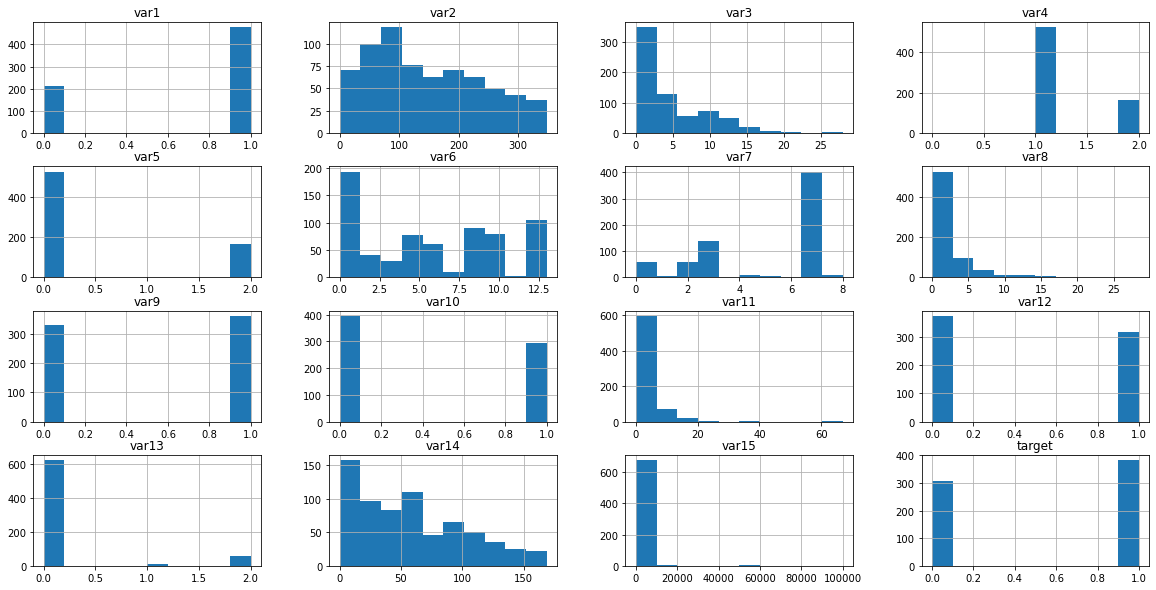

In [12]:
df.hist()
plt.gcf().set_size_inches(20, 10)

## 2. Logistic Regression - statsmodels

#### Splitting data in train and test and setting target.

In [13]:
df.columns

Index(['var1', 'var2', 'var3', 'var4', 'var5', 'var6', 'var7', 'var8', 'var9',
       'var10', 'var11', 'var12', 'var13', 'var14', 'var15', 'target'],
      dtype='object')

In [14]:
x = df.drop('target', axis = 1)
y = df['target']

x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.5, random_state = 42)

#### Model selection and training.

In [15]:
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)

reg_log = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
reg_log = reg_log.fit()

## 3. Model evaluation

#### Checking statistical significance
- P value > 0.005, E.g. var4 and var5.
- coefs weights that are too extreme, this coefs are too predominant, E.g. var4 and var5.  
    it may be a scale issue, but in this may not be the case, because var9 also goes from 0 to 2, and is statistically significant and its scale is closer to the mean scale.  
- In this circumstances this variables may be removed or if they are important to the business, they can be kept in the model.

In [16]:
reg_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                 target   No. Observations:                  345
Model:                            GLM   Df Residuals:                      329
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -106.02
Date:                Sat, 16 Apr 2022   Deviance:                       212.05
Time:                        17:55:41   Pearson chi2:                     306.
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         26.8359   1.18e+04      0.002      0.998   -2.31e+04    2.32e+04
var1           0.0900      0.398      0.226      0.821      -0.690       0.870
var2          -0.0016      0.002     -0.727      0.467      -0.006       0.003
var3           0.0287      0.042      0.677      0.498      -0.054       0.112
var4         -23.1711   1.18e+04     -0.002      0.998   -2.32e+04    2.31e+04
var5          12.0294   5910.128      0.002      0.998   -1.16e+04    1.16e+04
var6          -0.0599      0.042     -1.411      0.158      -0.143       0.023
var7          -0.0405      0.074     -0.546      0.585      -0.186       0.105
var8          -0.1536      0.080     -1.918      0.055      -0.311       0.003
var9          -3.7686      0.444     -8.494      0.000      -4.638      -2.899
var10         -0.6615      0.450     -1.469      0.142      -1.544       0.221
var11         -0.0316      0.052     -0.607      0.544      -0.134       0.071
var12          0.3242      0.377      0.859      0.390      -0.416       1.064
var13          0.0647      0.341      0.190      0.849      -0.603       0.732
var14          0.0006      0.004      0.150      0.881      -0.008       0.009
var15         -0.0006      0.000     -2.594      0.009      -0.001      -0.000
==============================================================================
"""

#### Checking if the coef and the data goes to same way
- If the rate of approval goes down when the value goes down, the coef should be negative. As is the case of var2 and var11.  
- While var3 and var14, values goes down and coef is positive.
- Having the coef beign positive when the data is goes down with the value may make sense statiscally,  
    but thinking on the business side, you may have to explain why the model gave you that result.  
    E.g. if someone applying for credit have a **rising income**, that varible **should not be negative** and penalize the result.   
- if the variable goes the opposite way (as is the case of var2), variable should be reworked (transform continuos to categorical data) or even drop that variable altogether.         

var11 coeficient:  -0.03161499252129427 



var11,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,19,20,23,40,67
reject,98,35,19,20,12,16,20,15,10,10,4,18,7,1,8,4,3,2,1,1,1,1,1
accept,297,36,26,8,3,2,3,1,0,0,4,1,1,0,0,0,0,0,0,1,0,0,0


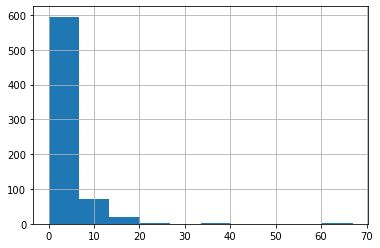

In [17]:
pd.set_option('display.max_columns', None)
cross_var11 = pd.crosstab(index = df['target'], columns = df['var11'])
print('var11 coeficient: ', reg_log.params.loc['var11'], "\n")
cross_var11.index = ['reject', 'accept']
df['var11'].hist()
cross_var11

#### Odds Ratio
- similar to the coefs in linear regression, its interpreted as how an increase of one unity in the variable increases (or decreases) the chance of having a postive outcome.
- exponencial is used because of the logistic regression equation: `y = e^(b0 + b1*x) / (1 + e^(b0 + b1*x))`
- that can be transformed in: `ln(y / 1 – y) = b0 + b1 * X`  
[What is Logistic Regression? A Guide to the Formula & Equation](https://www.springboard.com/blog/data-science/what-is-logistic-regression/)
- We can also see how much var4 and var5 impacts in the model. 

In [18]:
print('Odds Ratio')
np.exp(reg_log.params)

Odds Ratio


const    4.515339e+11
var1     1.094121e+00
var2     9.983800e-01
var3     1.029094e+00
var4     8.647837e-11
var5     1.676051e+05
var6     9.418722e-01
var7     9.603298e-01
var8     8.576457e-01
var9     2.308388e-02
var10    5.160556e-01
var11    9.688795e-01
var12    1.382894e+00
var13    1.066877e+00
var14    1.000639e+00
var15    9.993996e-01
dtype: float64

#### Model predict for train and test database

In [19]:
y_pred_train = reg_log.predict(x_train_sm)
y_pred_test = reg_log.predict(x_test_sm)

#### Calculating ROC and GINI
- Checking model's stability and quality.
- the model is stable, what ir learned in the train was translated correctly to the test dataset.
- Gini is a little too far, but it may be caused due to var4 and var5.

In [20]:
fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_pred_train)
roc_auc_train = auc(fpr_train, tpr_train)
                                                 
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, y_pred_test)
roc_auc_test = auc(fpr_test, tpr_test)   
print('Both these metrics (AUC and Gini) are a scored from 0 to 1, 1 being the perfect score')
print('-------------------------------------------------------------------------------------')
print('AUC - train: ', round(roc_auc_train,4))                                              
print('AUC - test: ', round(roc_auc_test,4), '\n')    

print('Gini - train: ',  round(2*roc_auc_train-1,4))
print('Gini - test: ',  round(2*roc_auc_test-1,4))

Both these metrics (AUC and Gini) are a scored from 0 to 1, 1 being the perfect score
-------------------------------------------------------------------------------------
AUC - train:  0.9398
AUC - test:  0.9048 

Gini - train:  0.8797
Gini - test:  0.8095


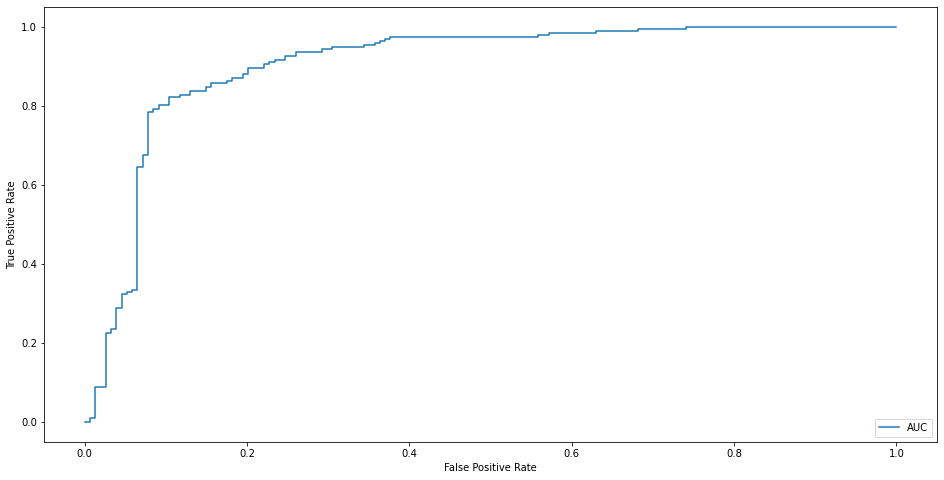

In [22]:
plt.plot(fpr_test,tpr_test,label="AUC")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.gcf().set_size_inches(16,8)
plt.show()

#### Cutoff point
- What's the best cutoff point for maximum?  
    The optimal cut off point would be where “true positive rate” is high and the “false positive rate” is low. Based on this logic, I have pulled an example below to find optimal threshold.  
    [Roc curve and cut off point. Python in Logistic-Regression](https://pyquestions.com/roc-curve-and-cut-off-point-python)
- The best cutoff point: 0.429

In [23]:
i = np.arange(len(fpr_train))
roc_train = pd.DataFrame({
    'fpr' : pd.Series(fpr_train, index = i),
    'tpr' : pd.Series(tpr_train, index = i),
    '1-fpr' : pd.Series(1-fpr_train, index = i),
    'tf' : pd.Series(tpr_train - (1-fpr_train), index = i),
    'thresholds' : pd.Series(thresholds_train, index = i),
})

cutoff_analysis = round(roc_train.loc[(roc_train.tf-0).abs().argsort()[:3]],3) 
## this line will sort the roc_train df by absolute lowest TF and return the lowest, this will be the optimal cutoff point.

print(cutoff_analysis)

      fpr    tpr  1-fpr     tf  thresholds
33  0.131  0.875  0.869  0.006       0.429
32  0.118  0.875  0.882 -0.007       0.430
34  0.131  0.880  0.869  0.011       0.427


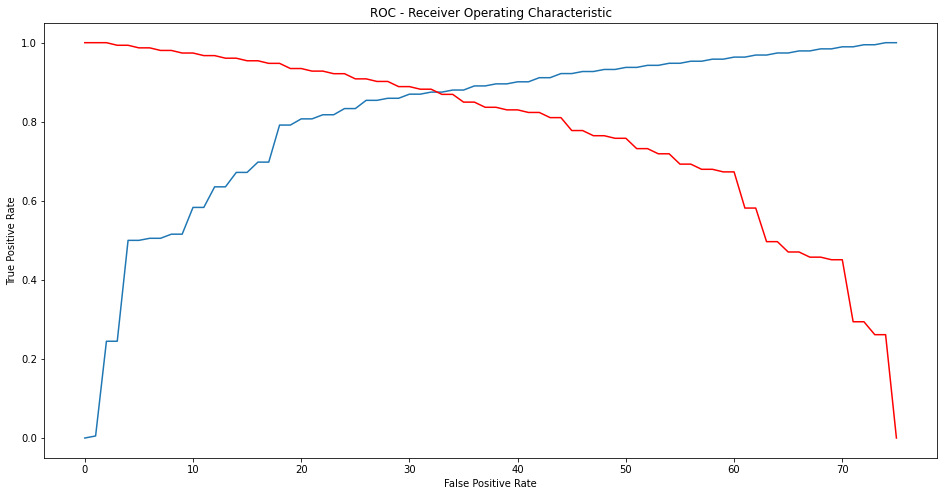

In [24]:
fig, ax = plt.subplots()
plt.plot(roc_train['tpr'])
plt.plot(roc_train['1-fpr'], color = 'red')
# plt.plot(roc_train['thresholds'], color = 'green')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Receiver Operating Characteristic')
# ax.set_xticklabels([]);
plt.gcf().set_size_inches(16,8)

### Binarizing the results
- for construction of confusion matrix, results should be binarized.  
    I will use cutoff point to determine who gets approved or rejected

In [25]:
cutoff = cutoff_analysis['thresholds'].values[0]
cutoff

0.429

In [26]:
y_pred_train_bin = y_pred_train
y_pred_test_bin = y_pred_test
print(y_pred_test.head())
print(y_pred_test_bin.head())

286    0.946797
511    0.172728
257    0.959992
336    0.960170
318    0.990019
dtype: float64
286    0.946797
511    0.172728
257    0.959992
336    0.960170
318    0.990019
dtype: float64


In [27]:
from sklearn.metrics import confusion_matrix


# binarizing the training data
for score in range(0, len(y_pred_train_bin-1)):
    if y_pred_train_bin.iloc[score] >= cutoff:
        y_pred_train_bin.iloc[score] = 1 ## approved
    else:
        y_pred_train_bin.iloc[score] = 0 ## rejected
        

# binarizing of the test data
for score in range(0, len(y_pred_test_bin-1)):
    if y_pred_test_bin.iloc[score] >= cutoff:
        y_pred_test_bin.iloc[score] = 1 ## approved
    else:
        y_pred_test_bin.iloc[score] = 0 ## rejected

print(y_pred_test.head())
print(y_pred_test_bin.head())

286    1.0
511    0.0
257    1.0
336    1.0
318    1.0
dtype: float64
286    1.0
511    0.0
257    1.0
336    1.0
318    1.0
dtype: float64


#### Confusion Matrix
- is used to check the True Positive Rate (1 == 1) and True False Rate (0 == 0)
- Scores are percentages of amount of data
- [How to Interpret the Confusion Matrix: Accuracy, Sensitivity, Specificity, Precision & F1 Score](https://projects.uplevel.work/insights/confusion-matrix-accuracy-sensitivity-specificity-precision-f1-score-how-to-interpret)

In [28]:
confusion_matrix_train = pd.DataFrame(confusion_matrix(y_train, y_pred_train_bin))
print("Evaluating training data: ")
print(round(confusion_matrix_train / len(y_train) * 100,2))
print("\n")

confusion_matrix_test = pd.DataFrame(confusion_matrix(y_test, y_pred_test_bin))
print("Evaluating test data: :")
print(round(confusion_matrix_test / len(y_train) * 100,2))

Evaluating training data: 
       0      1
0  38.84   5.51
1   6.96  48.70


Evaluating test data: :
       0      1
0  37.68   6.96
1   8.41  46.96


#### Accuracy
- Accuracy is defined by the equation: `(TP+TN)/(TP+FP+FN+TN)`

In [29]:
TP = round(confusion_matrix_test[1][1] / len(y_train) * 100 ,2)
TN = round(confusion_matrix_test[0][0] / len(y_train) * 100 ,2)
FP = round(confusion_matrix_test[1][0] / len(y_train) * 100 ,2)
FN = round(confusion_matrix_test[0][1] / len(y_train) * 100 ,2)

((TP+TN)/(TP+FP+FN+TN) * 100)

84.63153684631538

## Conclusion.
- This model is pretty accurate (84.63%) already, but it may become better with some feature engineering.  
    - next I will run the model without var4 and var5.
    - after that I will try to categorize var2, var3 and var14.

##### this code is here, so I don't lose it.
teste = pd.read_html(reg_log.summary().tables[1].as_html(),header=0,index_col=0)[0]  
teste['P>|z|'][1:]  
[Converting statsmodels summary object to Pandas Dataframe](https://stackoverflow.com/questions/51734180/converting-statsmodels-summary-object-to-pandas-dataframe)